In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [29]:
HousePrice = pd.read_csv('house_price_data.csv')

In [30]:
HousePrice.head() 

,SqFt Area,Price (INR in Lakhs)
0,650,30.2
1,620,29.0
2,1530,95.0
3,1500,93.0
4,1300,78.0


In [31]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SqFt Area             50 non-null     int64  
 1   Price (INR in Lakhs)  50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [32]:
HousePrice.describe()

,SqFt Area,Price (INR in Lakhs)
count,50.000000,50.000000
mean,1122.000000,64.904000
std,381.002973,27.894005
min,450.000000,18.500000
25%,805.000000,40.450000
50%,1125.000000,64.750000
75%,1445.000000,89.125000
max,1750.000000,112.000000


In [33]:
 HousePrice.columns

Index(['SqFt Area', 'Price (INR in Lakhs)'], dtype='object')

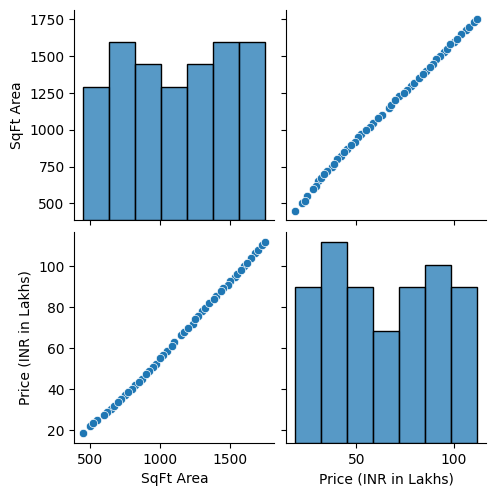

In [34]:
sns.pairplot(HousePrice)

In [35]:
# Applying usnull() to each cell in the data if number is not null it will return False. If it is null it will return True
HousePrice.isnull()

,SqFt Area,Price (INR in Lakhs)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [36]:
# Check for missing values 
missing_values = HousePrice.isnull().sum()
# Display missing values for each column
print("Missing values in each column:", missing_values)

Missing values in each column: SqFt Area               0
Price (INR in Lakhs)    0
dtype: int64


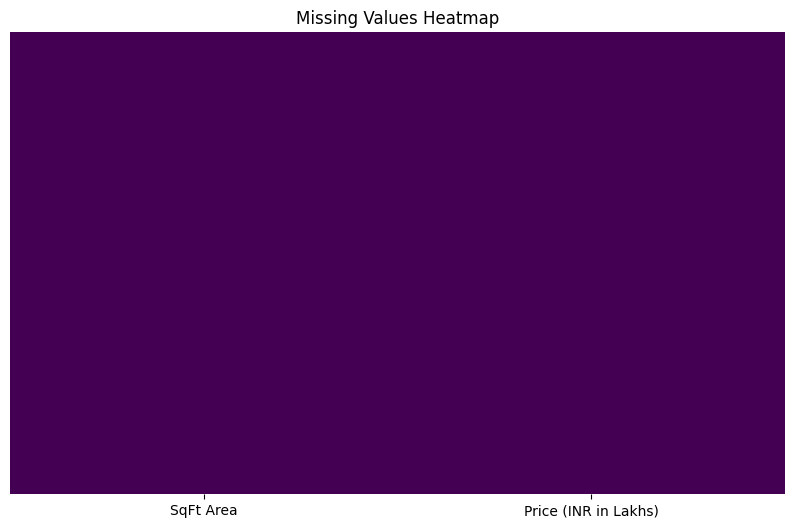

In [37]:
#Visualize missing values(in yellow) and non-missing values(in purple) in the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(HousePrice.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [38]:
print(HousePrice.columns.tolist())
# Remove any leading/trailing whitespace from column names
HousePrice.columns = HousePrice.columns.str.strip()

# Rename columns for easier access
HousePrice.rename(columns={
    'SqFt Area': 'SqFtArea',
    'Price (INR in Lakhs)': 'Price'
}, inplace=True)

print(HousePrice.columns.tolist())
# Should output: ['SqFtArea', 'Price']


['SqFt Area', 'Price (INR in Lakhs)']
['SqFtArea', 'Price']


In [39]:
#Proceeding with outlier detection and removal
HousePrice.select_dtypes(include='number').columns

Index(['SqFtArea', 'Price'], dtype='object')

In [40]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

HousePrice = remove_outliers_iqr(HousePrice, 'SqFtArea')
HousePrice = remove_outliers_iqr(HousePrice, 'Price')


In [41]:
from sklearn.model_selection import train_test_split

X = HousePrice[['SqFtArea']]
y = HousePrice['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 3.10
RMSE: 1.76
R² Score: 0.9968


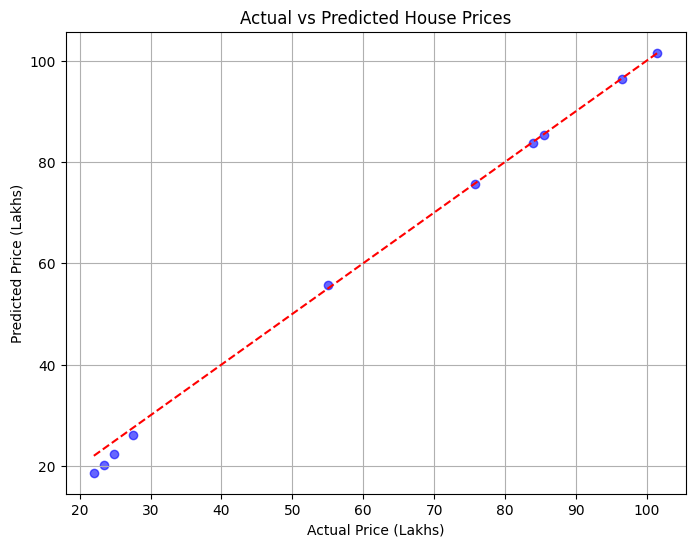

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
